<a href="https://colab.research.google.com/github/gr3g-z/TCC-PUCSP-CDIA/blob/main/tcc_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Product

### Limpeza dos Dados

In [ ]:
#!pip install fbprophet

In [ ]:
from prophet import Prophet
import pandas as pd
import re

In [ ]:
jan = pd.read_csv('/content/Sales_January_2019.csv')
fev = pd.read_csv('/content/Sales_February_2019.csv')
mar = pd.read_csv('/content/Sales_March_2019.csv')
abr = pd.read_csv('/content/Sales_April_2019.csv')
mai = pd.read_csv('/content/Sales_May_2019.csv')
jun = pd.read_csv('/content/Sales_June_2019.csv')
jul = pd.read_csv('/content/Sales_July_2019.csv')
ago = pd.read_csv('/content/Sales_August_2019.csv')
sep = pd.read_csv('/content/Sales_September_2019.csv')
out = pd.read_csv('/content/Sales_October_2019.csv')
nov = pd.read_csv('/content/Sales_November_2019.csv')
dez = pd.read_csv('/content/Sales_December_2019.csv')

In [ ]:
df = pd.concat([jan, fev, mar, abr, mai, jun, jul, ago, sep, out, nov, dez])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [ ]:
df['Product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine', nan, 'Product'], dtype=object)

In [ ]:
print(df.isna().sum())

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64


In [ ]:
df = df.dropna(axis = 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [ ]:
df['Order Date'].head()

0    01/22/19 21:25
1    01/28/19 14:15
2    01/17/19 13:33
3    01/05/19 20:33
4    01/25/19 11:59
Name: Order Date, dtype: object

In [ ]:
import pandas as pd

# Converta a coluna 'Order Date' para datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


In [ ]:
df = df.dropna(subset=['Order Date'])


In [ ]:
df_cleaned = df.copy()

# Converta a coluna 'Order Date' para datetime
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

df_cleaned['Quantity Ordered'] = df_cleaned['Quantity Ordered'].astype(int)
df_cleaned['Price Each'] = df_cleaned['Price Each'].astype(float)

# Remova as linhas com valores não convertíveis
df_cleaned = df_cleaned.dropna(subset=['Order Date'])


In [ ]:
df_cleaned

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


### FB Prophet Forecasting

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


In [ ]:
df_forecast = df_cleaned.iloc[:, [3, 4]] # Renomeie as colunas se desejar
df_forecast.columns = ['Price Each', 'Purchase Date']

In [ ]:
df_forecast = df_forecast.rename(columns={'Purchase Date': 'ds', 'Price Each': 'y'})

In [ ]:
df_forecast

,y,ds
0,700.00,2019-01-22 21:25:00
1,14.95,2019-01-28 14:15:00
2,11.99,2019-01-17 13:33:00
3,149.99,2019-01-05 20:33:00
4,11.99,2019-01-25 11:59:00
...,...,...
25112,14.95,2019-12-11 20:58:00
25113,3.84,2019-12-01 12:01:00
25114,400.00,2019-12-09 06:43:00
25115,11.99,2019-12-03 10:39:00


In [ ]:
m = Prophet()
m.fit(df_forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzavwxrpx/x7bwlvmj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzavwxrpx/wh0rywp6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59413', 'data', 'file=/tmp/tmpzavwxrpx/x7bwlvmj.json', 'init=/tmp/tmpzavwxrpx/wh0rywp6.json', 'output', 'file=/tmp/tmpzavwxrpx/prophet_model_1rjxdrd/prophet_model-20230929191804.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:18:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:18:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01 03:07:00,184.642100,-245.287869,605.283483,184.642100,184.642100,-0.165378,-0.165378,-0.165378,0.215820,0.215820,0.215820,-0.381198,-0.381198,-0.381198,0.0,0.0,0.0,184.476722
1,2019-01-01 03:40:00,184.641651,-244.398092,574.501870,184.641651,184.641651,-2.617197,-2.617197,-2.617197,-2.269496,-2.269496,-2.269496,-0.347701,-0.347701,-0.347701,0.0,0.0,0.0,182.024454
2,2019-01-01 04:56:00,184.640617,-211.522842,616.152063,184.640617,184.640617,-6.254764,-6.254764,-6.254764,-5.990976,-5.990976,-5.990976,-0.263788,-0.263788,-0.263788,0.0,0.0,0.0,178.385853
3,2019-01-01 05:53:00,184.639841,-257.651568,605.231658,184.639841,184.639841,-5.255981,-5.255981,-5.255981,-5.061140,-5.061140,-5.061140,-0.194841,-0.194841,-0.194841,0.0,0.0,0.0,179.383859
4,2019-01-01 06:03:00,184.639705,-274.397965,643.160856,184.639705,184.639705,-4.761177,-4.761177,-4.761177,-4.578947,-4.578947,-4.578947,-0.182230,-0.182230,-0.182230,0.0,0.0,0.0,179.878528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142420,2020-01-27 05:13:00,182.795750,-253.740631,636.806712,182.439637,183.183845,-6.488473,-6.488473,-6.488473,-6.073681,-6.073681,-6.073681,-0.414792,-0.414792,-0.414792,0.0,0.0,0.0,176.307277
142421,2020-01-28 05:13:00,182.801631,-253.034117,594.182291,182.426183,183.216136,-6.317435,-6.317435,-6.317435,-6.073681,-6.073681,-6.073681,-0.243754,-0.243754,-0.243754,0.0,0.0,0.0,176.484196
142422,2020-01-29 05:13:00,182.807512,-226.067179,585.747883,182.413602,183.241134,-4.096707,-4.096707,-4.096707,-6.073681,-6.073681,-6.073681,1.976974,1.976974,1.976974,0.0,0.0,0.0,178.710805
142423,2020-01-30 05:13:00,182.813393,-272.129120,592.348772,182.399246,183.278207,-5.505563,-5.505563,-5.505563,-6.073681,-6.073681,-6.073681,0.568119,0.568119,0.568119,0.0,0.0,0.0,177.307831


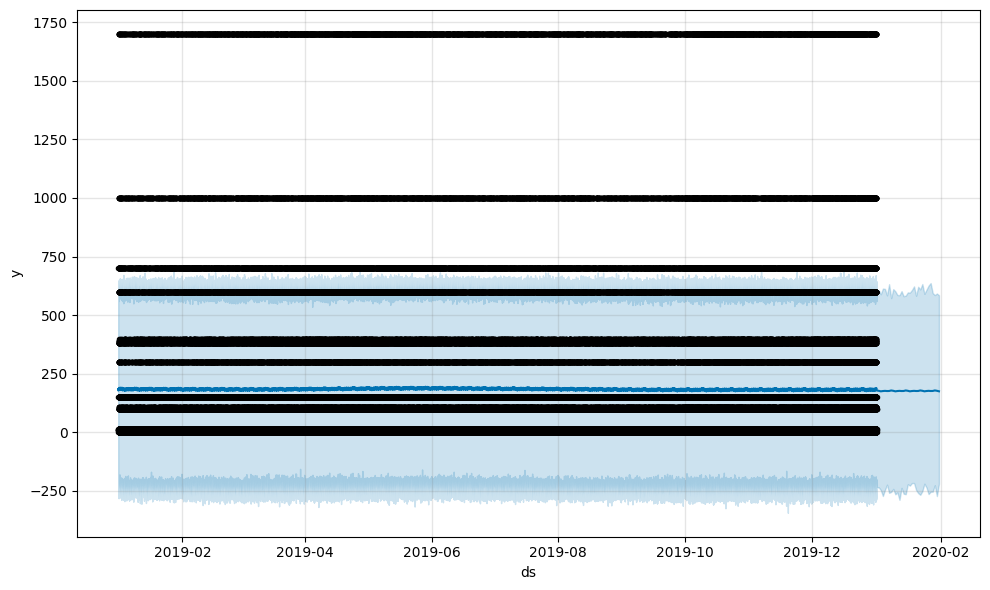

In [ ]:
m.plot(forecast);

## Divisao de Produtos

In [ ]:
df_cleaned['Product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine'], dtype=object)

In [ ]:
top_produtos = df_cleaned['Product'].value_counts()
df_top_produtos = pd.DataFrame(list(top_produtos.items()), columns=['Product', 'Count'])
df_top_produtos

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [ ]:
import plotly.express as px

fig = px.bar(df_top_produtos, x='Product', y='Count', color = 'Product', title="Quantidade de Vendas por Produto em 2019")
fig.show()

### Apple Iphone

In [ ]:
produto_iphone = 'iPhone'

# Filtrar o DataFrame original para incluir apenas o produto específico
df_iPhone = df_cleaned[df_cleaned['Product'] == produto_iphone].copy()

In [ ]:
df_iPhone['Quantity Ordered'].unique()

array([1, 2])

In [ ]:
produto_iphone = 'iPhone'

# Filtrar o DataFrame original para incluir apenas o produto específico
df_iPhone = df_cleaned[df_cleaned['Product'] == produto_iphone].copy()
df_iPhone

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.0,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
104,141336,iPhone,1,700.0,2019-01-09 18:23:00,"811 Hickory St, Portland, OR 97035"
164,141394,iPhone,1,700.0,2019-01-06 16:54:00,"534 12th St, San Francisco, CA 94016"
207,141437,iPhone,1,700.0,2019-01-10 15:40:00,"377 Meadow St, New York City, NY 10001"
228,141457,iPhone,1,700.0,2019-01-09 22:11:00,"820 Jackson St, Seattle, WA 98101"
...,...,...,...,...,...,...
25040,319596,iPhone,1,700.0,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001"
25048,319603,iPhone,1,700.0,2019-12-26 19:06:00,"102 9th St, Boston, MA 02215"
25074,319629,iPhone,1,700.0,2019-12-18 15:41:00,"941 Willow St, Dallas, TX 75001"
25080,319634,iPhone,1,700.0,2019-12-11 16:29:00,"817 Center St, Boston, MA 02215"


In [ ]:
# Converta a coluna 'Order Date' para o tipo de dado de data
df_iPhone['Order Date'] = pd.to_datetime(df_iPhone['Order Date'])

# Crie uma nova coluna 'Date' que contenha apenas a data, ignorando a hora
df_iPhone['Date'] = df_iPhone['Order Date'].dt.date

# Agora, agrupe os dados por 'Date' e some a 'Quantity Ordered' em cada grupo
vendas_por_dia = df_iPhone.groupby('Date')['Quantity Ordered'].sum()

In [ ]:
vendas_por_dia

Date
2019-01-01    16
2019-01-02    15
2019-01-03    11
2019-01-04     7
2019-01-05     7
              ..
2019-12-28    20
2019-12-29    28
2019-12-30    28
2019-12-31    23
2020-01-01     2
Name: Quantity Ordered, Length: 366, dtype: int64

In [ ]:
# Converta a coluna 'Order Date' para o tipo de dado de data
df_iPhone['Order Date'] = pd.to_datetime(df_iPhone['Order Date'])

# Crie uma nova coluna 'Date' que contenha apenas a data, ignorando a hora
df_iPhone['Date'] = df_iPhone['Order Date'].dt.date

# Agora, agrupe os dados por 'Date' e some a 'Quantity Ordered' em cada grupo
vendas_por_dia = df_iPhone.groupby('Date')['Quantity Ordered'].sum()


In [ ]:
# Resetando o índice para que a data se torne uma coluna
df_iPhone_Dia = vendas_por_dia.reset_index()

# Renomeando as colunas
df_iPhone_Dia.columns = ['Data', 'Quantidade Vendida']

In [ ]:
df_iPhone_Dia

,Data,Quantidade Vendida
0,2019-01-01,16
1,2019-01-02,15
2,2019-01-03,11
3,2019-01-04,7
4,2019-01-05,7
...,...,...
361,2019-12-28,20
362,2019-12-29,28
363,2019-12-30,28
364,2019-12-31,23


In [ ]:
df_forecast_iPhone = df_iPhone_Dia # Renomeie as colunas se desejar
df_forecast_iPhone.df_forecast_iPhone = ['Quantidade Vendida', 'Data']
df_forecast_iPhone = df_iPhone_Dia.rename(columns={'Data': 'ds', 'Quantidade Vendida': 'y'})
m = Prophet()
m.fit(df_forecast_iPhone)

<ipython-input-31-b84287339e0c>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_forecast_iPhone.df_forecast_iPhone = ['Quantidade Vendida', 'Data']
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzavwxrpx/8o3pj9ko.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzavwxrpx/x3w3q9iy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68929', 'data', 'file=/tmp/tmpzavwxrpx/8o3pj9ko.json', 'init=/tmp/tmpzavwxrpx/x3w3q9iy.json', 'output', 'file=/tmp/tmpzavwxrpx/prophet_modelf8uvzrji/prophet_model-20230929192210.csv', 'method=optimize'

In [ ]:
df_forecast_iPhone

,ds,y
0,2019-01-01,16
1,2019-01-02,15
2,2019-01-03,11
3,2019-01-04,7
4,2019-01-05,7
...,...,...
361,2019-12-28,20
362,2019-12-29,28
363,2019-12-30,28
364,2019-12-31,23


In [ ]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [ ]:
future

,ds
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05
...,...
391,2020-01-27
392,2020-01-28
393,2020-01-29
394,2020-01-30


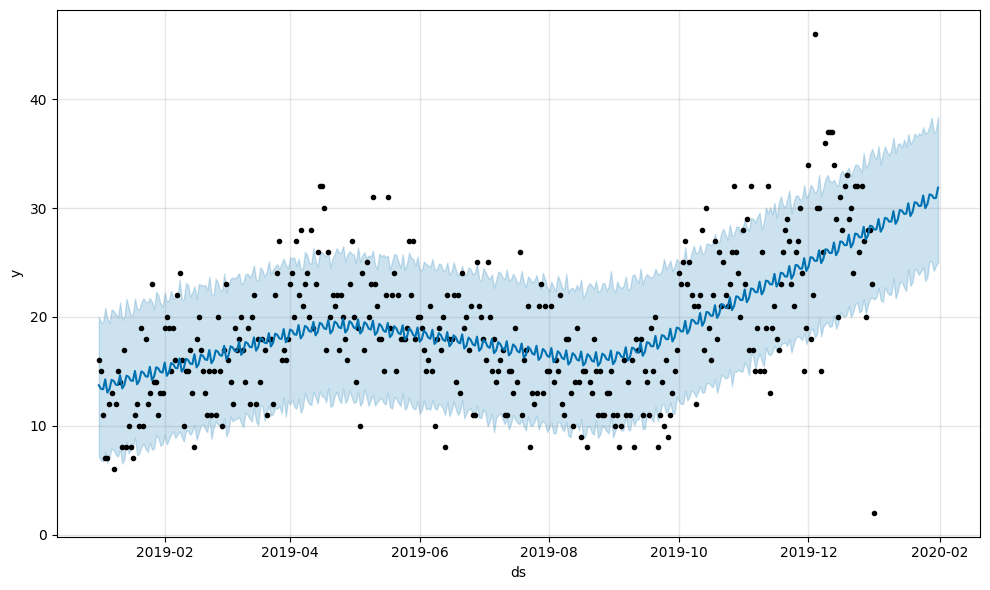

In [ ]:
m.plot(forecast);

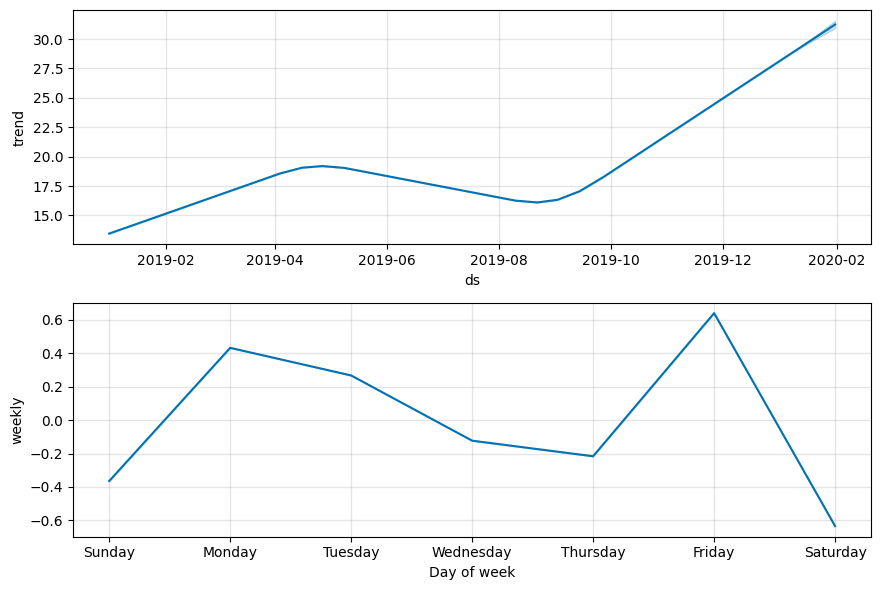

In [ ]:
m.plot_components(forecast);

### Google Phone

In [ ]:
produto_GooglePhone = 'Google Phone'
# Filtrar o DataFrame original para incluir apenas o produto específico
df_googlePhone = df_cleaned[df_cleaned['Product'] == produto_GooglePhone].copy()
df_googlePhone

### Lightning Charging Cable

In [ ]:
produto_LightningCable = 'Lightning Charging Cable'
# Filtrar o DataFrame original para incluir apenas o produto específico
df_cabo = df_cleaned[df_cleaned['Product'] == produto_LightningCable].copy()
df_cabo

### UBS-C Charging Cable

In [ ]:
produto_USBcCable = 'USB-C Charging Cable'
# Filtrar o DataFrame original para incluir apenas o produto específico
df_caboUsbC = df_cleaned[df_cleaned['Product'] == produto_USBcCable].copy()
df_caboUsbC

### Wired Headphones

In [ ]:
produto_foneFio ='Wired Headphones'
df_foneFio = df_cleaned[df_cleaned['Product'] == produto_foneFio].copy()
df_foneFio


### Apple Airpods Headphones

In [ ]:
produto_AirPods ='Apple Airpods Headphones'
df_airPods = df_cleaned[df_cleaned['Product'] == produto_AirPods].copy()
df_airPods